# Lets us have look on the Time line of the project



1.   import libraries and Dataset
2.   Data analysis,preprocessing and cleaning
3.model building using ml model   
4.AutoML approach:TPOT   





In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df=pd.read_csv("ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [4]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [5]:
df.shape

(76014, 15)

In [6]:
df['total']

0        222
1        222
2        222
3        222
4        222
        ... 
76009    129
76010    129
76011    129
76012    129
76013    129
Name: total, Length: 76014, dtype: int64

<!-- Data analysis and cleaning -->

In [7]:
# data analysis and data cleaning

In [8]:
# first we will remove all the unwanted columns from the dataset

In [9]:
unwanted_columns=['mid','striker','non-striker','venue','batsman','bowler']

In [10]:
df['venue'].nunique()

35

In [11]:
df['batsman'].nunique()

411

In [12]:
df['bowler'].nunique()

329

In [13]:
df['bat_team'].nunique()

14

In [14]:
df['bowl_team'].nunique()

14

In [15]:
df.drop(labels=unwanted_columns,axis=1,inplace=True)

In [16]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [17]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [18]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [19]:
# We will select some popular teams for our analysis

In [20]:
selected_team=['Chennai Super Kings','Royal Challengers Bangalore','Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Sunrisers Hyderabad','Kolkata Knight Riders','Delhi Daredevils']



In [21]:
# Keeping only selected teams and rest remove it

In [22]:
df=df[(df['bat_team'].isin(selected_team)) & (df['bowl_team'].isin(selected_team))]

In [23]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [24]:
df.shape

(53811, 9)

In [25]:
# we will remove first five over of match as they shows no significance on deciding will which team will win the watch

In [26]:
df=df[df["overs"]>=5.0]

In [27]:
df.shape

(40108, 9)

In [28]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.1+ MB


In [30]:
# We need to convert our date from string to datetime format
from datetime import datetime

In [31]:
df['date'] =df['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   bat_team        40108 non-null  object        
 2   bowl_team       40108 non-null  object        
 3   runs            40108 non-null  int64         
 4   wickets         40108 non-null  int64         
 5   overs           40108 non-null  float64       
 6   runs_last_5     40108 non-null  int64         
 7   wickets_last_5  40108 non-null  int64         
 8   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


In [33]:
# DataPreprocessing

In [34]:
# Checking for missing value

In [35]:
df.isnull().sum()

date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

In [36]:
# Encoding Part

In [37]:
model_df =pd.get_dummies(data=df,columns=['bat_team',"bowl_team"])

In [38]:
model_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   bat_team        40108 non-null  object        
 2   bowl_team       40108 non-null  object        
 3   runs            40108 non-null  int64         
 4   wickets         40108 non-null  int64         
 5   overs           40108 non-null  float64       
 6   runs_last_5     40108 non-null  int64         
 7   wickets_last_5  40108 non-null  int64         
 8   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


In [40]:
# Rearranging our columns

In [41]:
model_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [42]:
model_df= model_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [43]:
model_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


In [44]:
# split the data into train and test

In [45]:
df['year']=df['date'].dt.year

In [46]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,2008
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,2008
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,2008
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,2008
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,2008


In [47]:
x_train=model_df.drop(labels='total',axis=1)[model_df['date'].dt.year<=2016]
x_test=model_df.drop(labels='total',axis=1)[model_df['date'].dt.year>=2017]

In [48]:
y_train=model_df[model_df['date'].dt.year <=2016]['total'].values
y_test=model_df[model_df['date'].dt.year >=2017]['total'].values

In [49]:
# now we have no need for date columns in x_train and x_test columns

In [50]:
x_train.drop(labels='date',axis=1,inplace=True)
x_test.drop(labels='date',axis=1,inplace=True)

In [51]:
x_train

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,0,5.1,59,0
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.2,59,1
34,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.3,59,1
35,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.4,59,1
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.5,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,194,7,19.2,54,4
68858,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,200,7,19.3,56,4
68859,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,201,7,19.4,56,4
68860,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,202,7,19.5,57,4


In [52]:
y_train

array([222, 222, 222, ..., 208, 208, 208])

Model Building

In [53]:
# Lasso Regression

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [55]:
lasso=Lasso()
params = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [56]:

lasso_regressor = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)

In [57]:
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [58]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [59]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [60]:
y_pred=lasso.predict(x_test)

In [61]:
# Evaluation

<Axes: ylabel='Density'>

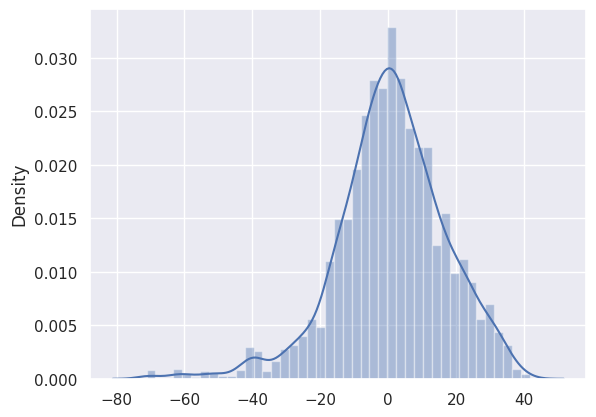

In [62]:
sns.distplot(y_test-y_pred)

In [63]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print()
print("MAPE:",metrics.mean_absolute_percentage_error(y_test,y_pred)*100)
print()
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print()
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print()

MAE: 12.213583996827493

MAPE: 8.411874642499965

MSE: 262.3653827960697

RMSE: 16.197696836157593



In [64]:
# Random forest regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor()

In [67]:
# HyperParameter Tuning:Randomized Search CV

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
# n_estimators
# max_features
# max_depth
# min_samples_split
# min_samples_leaf
# bootstrap

# No of Trees in RF
n_estimators =[int(x) for x in np.linspace(start=100,stop=800,num=4)]

# No of features to consider at every split
max_features =["auto","sqrt","log2"]

# Max no of levels in tree-post prunning
max_depth=[int(x) for x in np.linspace(10,60,num=6)]
max_depth.append(None)

# min no of samples required to split a node
min_samples_split =[2,5,10]

#   Min no of sample required at each leaf node
min_samples_leaf= [1,2,4]

# Method of selecting samples for training each tree
bootstrap=[True,False]

In [70]:
# Create the random grid hyperparameter tuning method

In [71]:
random_grid={"n_estimators":n_estimators,'max_features':max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf,"bootstrap":bootstrap}

In [72]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=1,random_state=42,n_jobs=-1)

In [73]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 333, 566, 800]},
                   random_state=42, verbose=1)

In [74]:
y_pred1=rf_random.predict(x_test)

<Axes: ylabel='Density'>

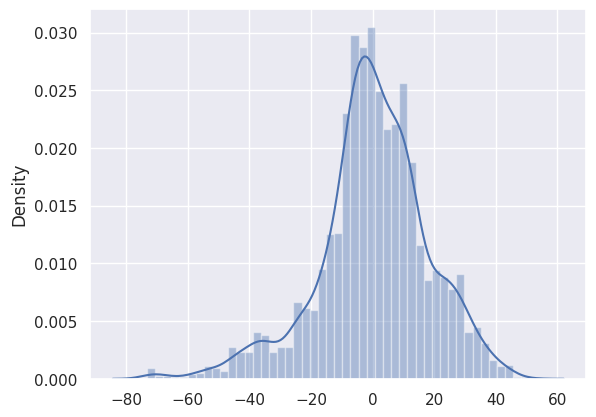

In [75]:
sns.distplot(y_test-y_pred1)

In [76]:

from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred1))
print()
print("MAPE:",metrics.mean_absolute_percentage_error(y_test,y_pred1)*100)
print()
print("MSE:",metrics.mean_squared_error(y_test,y_pred1))
print()
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print()

MAE: 13.416954784572647

MAPE: 8.85889894193943

MSE: 325.1612054021322

RMSE: 18.03222685644045



# Using TPOT auto ml

In [77]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=51db29066b9fa6e011624ceaeb95e424613a3f2d461d508e7e2a823765e954c1
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [78]:
# check tpot version

import tpot
print('tpot : %s' %tpot.__version__)

tpot : 0.12.1


In [ ]:
# Regression Problem
from tpot import TPOTRegressor

In [ ]:
# We will use the same data which we used above
# first we can define the method for evaluating models.we will use a good practice of repeated k fold cross validation

In [81]:
from sklearn.model_selection import RepeatedKFold

In [82]:
# Define evaluation procedure
cv=RepeatedKFold(n_splits=3,n_repeats=3,random_state=1)

In [83]:
# Defining our model
model=TPOTRegressor(generations=5,population_size=20,scoring="neg_mean_absolute_error",cv=cv,n_jobs=-1,random_state=0,verbosity=2)

In [84]:
# Perform the Search

In [ ]:
model.fit(x_train,y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

In [ ]:
print(model.score(x_test,y_test))

In [ ]:
# finding the best pipeline
model.fitted_pipeline

In [ ]:
y_pred2=model.predict(x_test)

In [ ]:
sns.distplot(y_test-y_pred2)

In [ ]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred2))
print()
print("MAPE:",metrics.mean_absolute_percentage_error(y_test,y_pred2)*100)
print()
print("MSE:",metrics.mean_squared_error(y_test,y_pred2))
print()
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))
print()